data src: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?select=train.csv

# Descriptive Statistics

Descriptive statistics refers to the application of statstical methods to a dataset to summarize and organize the characterstics of the data. It is a way to capture data patterns and translate them to a human-understandable form.

Basically, descriptive statistics refers to the analysis, summary, and communication of findings that describe a dataset.

Often not useful for decision-making, descriptive statistics still hold value in explaining high-level summaries of a set of information.

### Types
1. Measures of Frequency
2. Measures of Central Tendency
3. Measures of Dispersion/Variability/Spread
4. Measures of Position


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data = pd.read_csv('/content/train.csv')

In [13]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [19]:
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

## Measures of Frequency
quantative measure of data

- Count: occurance (or NOT occurance) of smth

In [15]:
count_classes = data.price_range.value_counts()
print(count_classes) #useful to see no. of classes and if there's imbalance

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64


In [20]:
data.touch_screen.value_counts()

1    1006
0     994
Name: touch_screen, dtype: int64

## Measures of Central Tendency
center or average of a dataset, it represents a single value around which the data tends to cluster

#### Types
1. Mean:arithmetic average (calculated by summing all values and dividing by the number of observations)

 Sensitive to outliers as a sigle extremly big or small value can cause huge changes

2. Median: The middle value when the data is arranged in ascending or descending order

less sensitive to outliers than the mean


3. Mode: most frequently occurring value(s) in the dataset
 A distribution can be unimodal (one mode), bimodal (two modes), or multimodal (more than two)


 #### Need
 1. provide a quick summary of the data distribution (understand typical/central values)
 2. handling missing values by using mean, median, or mode for imputation
 3. Feature selection to identify variables with stronger central tendency

#### Example Scenario:
Suppose you have a dataset containing various features, and you're tasked with identifying which features are crucial for predicting housing prices based on several attributes. One of the features is the number of bedrooms in a house.

**Mean, Median, and Mode for the Number of Bedrooms:**

Mean: The average number of bedrooms in the dataset.

Median: The middle value when all the bedroom counts are arranged in ascending order.

Mode: The most frequently occurring bedroom count.

**Influence**

Scenario 1: Normally Distributed Data: If the number of bedrooms is normally distributed around a specific value (e.g., mean = 3.5 bedrooms) with minimal skewness, the mean and median might be close, indicating a strong central tendency. In this case, this feature might be considered more crucial for predicting housing prices as it's representative of most houses in the dataset.

Scenario 2: Highly Skewed Data: If the distribution of the number of bedrooms is highly skewed, let's say towards having 2 bedrooms, the mode might be 2 bedrooms, while the mean and median could be significantly different. This skewness might suggest that the number of bedrooms is less diverse across houses and might not be as influential in predicting housing prices.


#### How Central Tendency Helps

1. Identifying Representativeness: Features with a strong central tendency (where mean, median, and mode align closely) might represent the majority of instances in the dataset, making them potentially more predictive.

2. Understanding Diversity: Features with less pronounced central tendencies might indicate diversity or less consistency across data instances, which might affect their predictive power.

In [16]:
data.mean()

battery_power    1238.51850
blue                0.49500
clock_speed         1.52225
dual_sim            0.50950
fc                  4.30950
four_g              0.52150
int_memory         32.04650
m_dep               0.50175
mobile_wt         140.24900
n_cores             4.52050
pc                  9.91650
px_height         645.10800
px_width         1251.51550
ram              2124.21300
sc_h               12.30650
sc_w                5.76700
talk_time          11.01100
three_g             0.76150
touch_screen        0.50300
wifi                0.50700
price_range         1.50000
dtype: float64

In [17]:
data.median()

battery_power    1226.0
blue                0.0
clock_speed         1.5
dual_sim            1.0
fc                  3.0
four_g              1.0
int_memory         32.0
m_dep               0.5
mobile_wt         141.0
n_cores             4.0
pc                 10.0
px_height         564.0
px_width         1247.0
ram              2146.5
sc_h               12.0
sc_w                5.0
talk_time          11.0
three_g             1.0
touch_screen        1.0
wifi                1.0
price_range         1.5
dtype: float64

In [18]:
data.mode()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,618.0,0.0,0.5,1.0,0.0,1.0,27.0,0.1,182.0,4.0,...,347.0,874.0,1229,17.0,1.0,7.0,1.0,1.0,1.0,0.0
1,1589.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1247.0,1464,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,1872.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2227,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2610,NaN,NaN,NaN,NaN,NaN,NaN,3.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3142,NaN,NaN,NaN,NaN,NaN,NaN,NaN


we must note that in the given dataset the above functions calculate mean, median and mode of even categorical values such as price_range (target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)), touch_screen(touch screen or not - 1 or 0) etc.

In [22]:
data[['px_height', 'px_width']].mean()

px_height     645.1080
px_width     1251.5155
dtype: float64

In [23]:
data[['px_height', 'px_width']].median()

px_height     564.0
px_width     1247.0
dtype: float64

as they have similar median and mean the data is normally distributed and not mean isnt skewed by some outlier

In [24]:
data['n_cores'].mode()

0    4
Name: n_cores, dtype: int64

most phones have 4 cores

## Measures of Dispersion

quantify how far apart or dispersed individual data points are from the central tendency measures

#### Types

1. Range: difference between the maximum and minimum values

2. Variance: average of the squared differences from the mean.

3. Standard Deviation: The square root of variance, indicating the average deviation from the mean

4. Quartiles and Interquartile Range (IQR): Measures spread around the median by dividing the data into quarters

#### Need
1. Understanding Data Variability: assess how much the data points deviate from the central tendency

2. Feature Selection: identify features with high variability, which might contribute more to predictive models

3. Outlier Detection: Larger spreads might indicate potential outliers or unusual data points that require further investigation or treatment

#### Example Scenario
Suppose you're analyzing a dataset of housing prices in a neighborhood:


**Application:** You're interested in understanding the variability in house prices.

**Measure of Spread:** Calculating the range, variance, or standard deviation of house prices could indicate how dispersed the prices are around the average.

**Insight:** A larger range or standard deviation might suggest a wider variability in housing prices, indicating different factors affecting house prices across the neighborhood.

### Range

**Insights**
- Provides the extent between the maximum and minimum values in a dataset
- Indicates the spread or dispersion of the entire dataset.

**Usage**
- Quick understanding of the data spread
- Identifying the scope of values covered in the dataset.

In [28]:
data.max()

battery_power    1998.0
blue                1.0
clock_speed         3.0
dual_sim            1.0
fc                 19.0
four_g              1.0
int_memory         64.0
m_dep               1.0
mobile_wt         200.0
n_cores             8.0
pc                 20.0
px_height        1960.0
px_width         1998.0
ram              3998.0
sc_h               19.0
sc_w               18.0
talk_time          20.0
three_g             1.0
touch_screen        1.0
wifi                1.0
price_range         3.0
dtype: float64

In [29]:
data.min()

battery_power    501.0
blue               0.0
clock_speed        0.5
dual_sim           0.0
fc                 0.0
four_g             0.0
int_memory         2.0
m_dep              0.1
mobile_wt         80.0
n_cores            1.0
pc                 0.0
px_height          0.0
px_width         500.0
ram              256.0
sc_h               5.0
sc_w               0.0
talk_time          2.0
three_g            0.0
touch_screen       0.0
wifi               0.0
price_range        0.0
dtype: float64

In [30]:
range = data.max() - data.min()
print(range)

battery_power    1497.0
blue                1.0
clock_speed         2.5
dual_sim            1.0
fc                 19.0
four_g              1.0
int_memory         62.0
m_dep               0.9
mobile_wt         120.0
n_cores             7.0
pc                 20.0
px_height        1960.0
px_width         1498.0
ram              3742.0
sc_h               14.0
sc_w               18.0
talk_time          18.0
three_g             1.0
touch_screen        1.0
wifi                1.0
price_range         3.0
dtype: float64


In [31]:
numerical_cols = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

In [32]:
data[numerical_cols].max() - data[numerical_cols].min()

battery_power    1497.0
clock_speed         2.5
fc                 19.0
int_memory         62.0
m_dep               0.9
mobile_wt         120.0
pc                 20.0
px_height        1960.0
px_width         1498.0
ram              3742.0
sc_h               14.0
sc_w               18.0
talk_time          18.0
dtype: float64

### Variance and Standard Deviation:

**Insights**

- higher variance indicates that data points are more dispersed or scattered from the meanl and suggests greater variability
- Standard deviation, the square root of variance, quantifies the average deviation from the mean
- higher standard deviation indicates greater variability or dispersion from the mean, while a smaller standard deviation implies data points are closer to the mean.

**Usage**
- In predictive modeling, high variance might imply that predictions could vary significantly, indicating potential instability in the model's performance.
- Features with higher variance might be considered more informative as they show greater variability and potentially more discriminatory power

In [35]:
np.var(data)

battery_power    1.929918e+05
blue             2.499750e-01
clock_speed      6.655299e-01
dual_sim         2.499098e-01
fc               1.883871e+01
four_g           2.495378e-01
int_memory       3.291023e+02
m_dep            8.314194e-02
mobile_wt        1.252509e+03
n_cores          5.231580e+00
pc               3.675753e+01
px_height        1.968429e+05
px_width         1.867030e+05
ram              1.176055e+06
sc_h             1.774256e+01
sc_w             1.896871e+01
talk_time        2.983988e+01
three_g          1.816178e-01
touch_screen     2.499910e-01
wifi             2.499510e-01
price_range      1.250000e+00
dtype: float64

In [36]:
data.var()

battery_power    1.930884e+05
blue             2.501001e-01
clock_speed      6.658629e-01
dual_sim         2.500348e-01
fc               1.884813e+01
four_g           2.496626e-01
int_memory       3.292670e+02
m_dep            8.318353e-02
mobile_wt        1.253136e+03
n_cores          5.234197e+00
pc               3.677592e+01
px_height        1.969414e+05
px_width         1.867964e+05
ram              1.176644e+06
sc_h             1.775143e+01
sc_w             1.897820e+01
talk_time        2.985481e+01
three_g          1.817086e-01
touch_screen     2.501161e-01
wifi             2.500760e-01
price_range      1.250625e+00
dtype: float64

In [39]:
data[numerical_cols].std()

battery_power     439.418206
clock_speed         0.816004
fc                  4.341444
int_memory         18.145715
m_dep               0.288416
mobile_wt          35.399655
pc                  6.064315
px_height         443.780811
px_width          432.199447
ram              1084.732044
sc_h                4.213245
sc_w                4.356398
talk_time           5.463955
dtype: float64

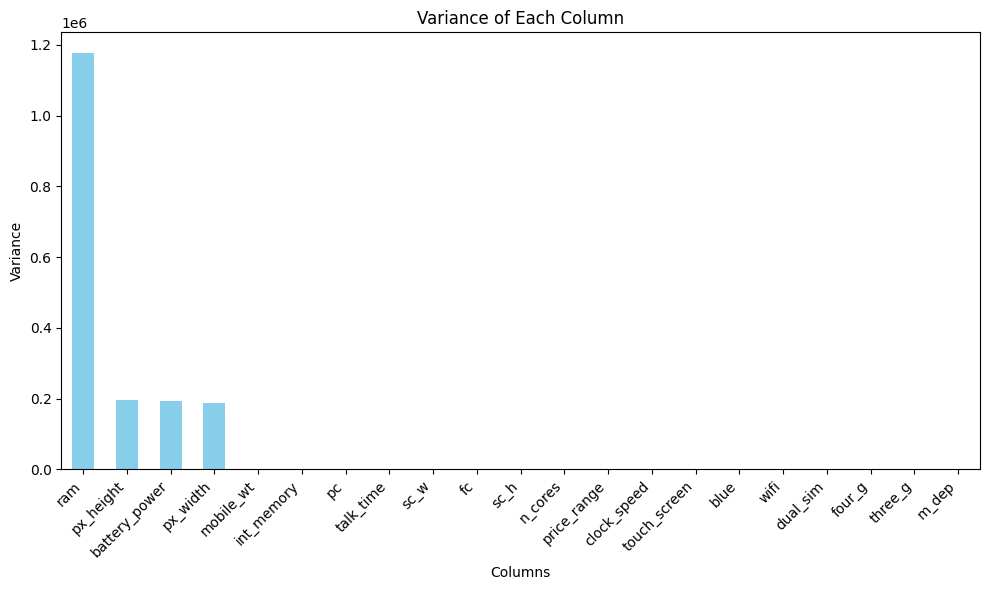

In [46]:
variances_sorted = data.var().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
variances_sorted.plot(kind='bar', color='skyblue')
plt.title('Variance of Each Column')
plt.xlabel('Columns')
plt.ylabel('Variance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Quartiles and Interquartile Range (IQR):
**Insights**
- Quartiles divide the data into quarters, indicating the spread around the median.
- IQR measures the range between the first (25th percentile) and third (75th percentile) quartiles.

**Usage**
- Identifies the central tendency's spread within different portions of the dataset.
- Helps detect outliers or extreme values outside the IQR boundaries.
- Provides insights into the variability in the middle 50% of the data.


#### Types of Quartiles:

**First Quartile (Q1) - 25th percentile:**

Represents the value below which 25% of the data fall.
Divides the lowest 25% of the dataset from the rest.

**Second Quartile (Q2) - 50th percentile (also known as the Median):**

Represents the middle value when the data is arranged in ascending or descending order.
Divides the data into two equal halves, with 50% of the data falling below and 50% above this value.

**Third Quartile (Q3) - 75th percentile:**

Represents the value below which 75% of the data fall.
Divides the lowest 75% of the dataset from the highest 25%.

**Interquartile Range (IQR):**

Calculating the IQR (Q3 - Q1) helps in identifying the middle 50% of the data, excluding potential outliers.


In [51]:
data[numerical_cols].quantile([0.25, 0.5, 0.75])

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0.25,851.75,0.7,1.0,16.0,0.2,109.0,5.0,282.75,874.75,1207.5,9.0,2.0,6.0
0.50,1226.00,1.5,3.0,32.0,0.5,141.0,10.0,564.00,1247.00,2146.5,12.0,5.0,11.0
0.75,1615.25,2.2,7.0,48.0,0.8,170.0,15.0,947.25,1633.00,3064.5,16.0,9.0,16.0


battery power is normally distributed

In [52]:
data['price_range'].quantile([0.25, 0.5, 0.75])

0.25    0.75
0.50    1.50
0.75    2.25
Name: price_range, dtype: float64

In [53]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

battery_power     763.50
blue                1.00
clock_speed         1.50
dual_sim            1.00
fc                  6.00
four_g              1.00
int_memory         32.00
m_dep               0.60
mobile_wt          61.00
n_cores             4.00
pc                 10.00
px_height         664.50
px_width          758.25
ram              1857.00
sc_h                7.00
sc_w                7.00
talk_time          10.00
three_g             0.00
touch_screen        1.00
wifi                1.00
price_range         1.50
dtype: float64


In [ ]:
sns.pairplot(data)
plt.title('Pair Plot of DataFrame')
plt.show()

### Outlier detection
Identifying outliers using quartiles and the Interquartile Range (IQR) involves defining a range beyond the quartiles that signifies potential outlier values.

**Steps to Identify Outliers using Quartiles and IQR:**
1. Calculate Quartiles (Q1 and Q3):Compute the first quartile (Q1) and third quartile (Q3) for the dataset.
2. Compute Interquartile Range (IQR):Calculate the IQR by subtracting Q1 from Q3 (IQR = Q3 - Q1).
3. Identify Potential Outliers:Define a range for potential outliers: values below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.

Values outside this range are considered potential outliers.

Note:
The formula utilizes the concept of dispersion measured by the IQR to identify potential outliers.

By adding or subtracting 1.5 times the IQR to/from the quartiles (Q1 and Q3), it extends the range beyond the bulk of the data.

This multiplier (1.5) is a rule of thumb and is based on statistical conventions. It's adjustable depending on the level of sensitivity desired for outlier detection.

The choice of 1.5 times the IQR is a balance between capturing potential outliers and minimizing false positives.

In [56]:
numerical_cols

['battery_power',
 'clock_speed',
 'fc',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time']

In [59]:
Q1 = data['clock_speed'].quantile(0.25)
Q3 = data['clock_speed'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in the column
outliers = data[(data['clock_speed'] < lower_bound) | (data['clock_speed'] > upper_bound)]

# Display or process the outliers
print("Identified outliers:")
print(outliers)

Identified outliers:
Empty DataFrame
Columns: [battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi, price_range]
Index: []

[0 rows x 21 columns]


In [60]:
Q1 = data['ram'].quantile(0.25)
Q3 = data['ram'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in the column
outliers = data[(data['ram'] < lower_bound) | (data['ram'] > upper_bound)]

# Display or process the outliers
print("Identified outliers:")
print(outliers)

Identified outliers:
Empty DataFrame
Columns: [battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi, price_range]
Index: []

[0 rows x 21 columns]


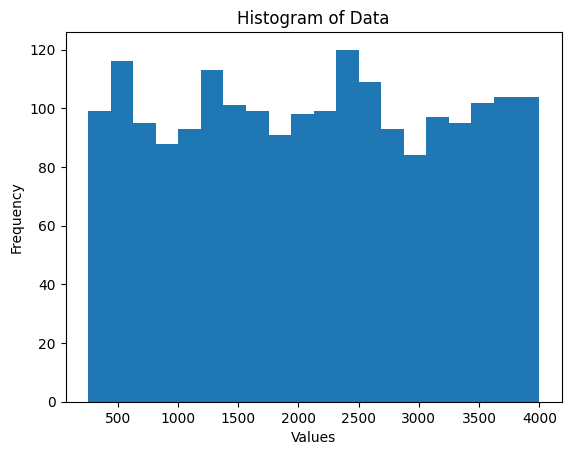

In [63]:
import matplotlib.pyplot as plt
plt.hist(data['ram'], bins=20)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.show()

### Measures of Position

statistical measures that indicate the position of a value within a dataset in relation to other values

#### Types
1. Percentiles: Divide the data into 100 equal parts, each representing a percentile.

2. Percentile Rank: Indicates the percentage of values in a dataset that are equal to or below a specific value.

#### Need
1. Understanding Distribution: Helps in understanding how a particular value compares to others in the dataset's distribution.
2. Identifying Ranks: Assists in ranking values, identifying top or bottom performers, or understanding a value's relative standing within a dataset.


**NOTE: Same as quantiles**

## SUMMARY

####Spread

**Insights from Each Measure:**
- Range: Overall span of the dataset, covering the maximum and minimum values
- Variance and Standard Deviation: Reflects the spread of data around the mean
- Quartiles and IQR: Measures spread around the median, providing insights into the central 50% of the data and outlier detection